In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
#dep info later
%matplotlib inline

In [32]:
df = pd.read_csv("cleandata.csv")
columns = list(df)
df['Position'] = pd.Categorical(df['Position'],
                                    categories=['Professor', 'Associate Professor', 'Assistant Professor', 'Lecturer',
                                                'Lab Lecturer'],
                                    ordered=True)
df["age_by_5"] = ((df["age"] -1)// 4) * 4+1
df["C"] = pd.to_numeric(df["C"], errors="coerce")
df["P"] = pd.to_numeric(df["P"], errors="coerce")
df["H"] = pd.to_numeric(df["H"], errors="coerce")
df["P5"] = pd.to_numeric(df["P5"], errors="coerce")
df["C5"] = pd.to_numeric(df["C5"], errors="coerce")
df["H5"] = pd.to_numeric(df["H5"], errors="coerce")
df["avgC"] = pd.to_numeric(df["avgC"], errors="coerce")
df["P5avg"] = df["P5"] /6
df["C5avg"] = df["C5"] /6
df["H5avg"] = df["H5"] /6

list_of_positions = ['Professor', 'Associate Professor', 'Assistant Professor', 'Lecturer', 'Lab Lecturer']
list_of_dept = df["Dept"].value_counts().index
df[["P","C","H","P5","C5","H5"]] = df[["P","C","H","P5","C5","H5"]].fillna(0)
df["Cavg"]=df["C"]/df["age"]




In [33]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV


<H3>Regression</H3>

In [34]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures



<H4>Linear Poly C-P</H4>

 R^2 = -9581.807189849213
[[20.3400888]]


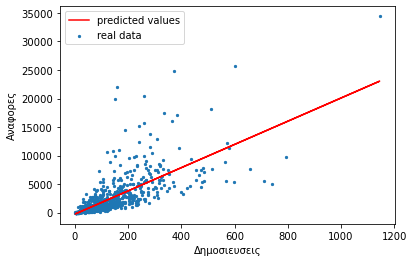

In [35]:

X = df["P"].to_numpy().reshape(-1, 1) 
y = df["C"].to_numpy().reshape(-1, 1) 


# linear pipe

grid= LinearRegression()
grid.fit(X,y)
pred = grid.predict(X)


print(f" R^2 = {pipe.score(X,y)}")
print(grid.coef_)


plt.ylabel("Αναφορες")
plt.xlabel("Δημοσιευσεις")
plt.plot(X,grid.predict(X),color = "red",label="predicted values" )
plt.scatter(X,y,s=5 ,label="real data")
plt.legend()
plt.savefig('lregC-P.png', dpi=300, bbox_inches='tight')

plt.show()





<H4>Linear Poly age-P</H4>

 R^2 = -747.5420082776634
[[6.14265442]]
[[-32.40691563]]


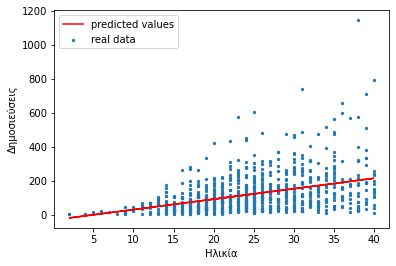

In [36]:

X = df["age"].to_numpy().reshape(-1, 1) 
y = df["P"].to_numpy().reshape(-1, 1) 


# linear pipe

grid= LinearRegression()
grid.fit(X,y)
pred = grid.predict(X)


print(f" R^2 = {pipe.score(X,y)}")
print(grid.coef_)
print(grid.predict([[0]]))

plt.ylabel("Δημοσιεύσεις")
plt.xlabel("Ηλικία")
plt.plot(X,grid.predict(X),color = "red",label="predicted values" )
plt.scatter(X,y,s=5 ,label="real data")
plt.legend()
plt.savefig('lregage-P.png', dpi=300, bbox_inches='tight')

plt.show()

<H4>Linear Poly age-P</H4>

 R^2 = -0.015473901936037482
[[123.92099269]]


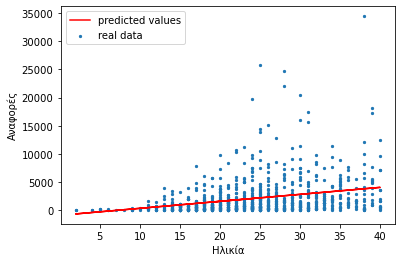

In [37]:

X = df["age"].to_numpy().reshape(-1, 1) 
y = df["C"].to_numpy().reshape(-1, 1) 


# linear pipe

grid= LinearRegression()
grid.fit(X,y)
pred = grid.predict(X)


print(f" R^2 = {pipe.score(X,y)}")
print(grid.coef_)


plt.ylabel("Αναφορές")
plt.xlabel("Ηλικία")
plt.plot(X,grid.predict(X),color = "red",label="predicted values" )
plt.scatter(X,y,s=5 ,label="real data")
plt.legend()
plt.savefig('lregage-c.png', dpi=300, bbox_inches='tight')

plt.show()

<H4>Linear Poly H-P</H4>


 R^2 = 0.6426186552716964
[[7.46869878]]


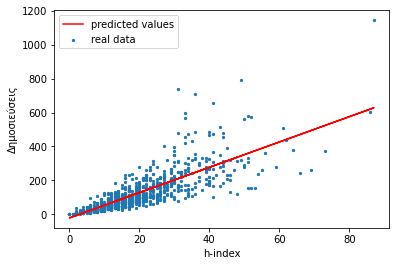

0.6429234888380567
[[0.         7.0578216  0.00759382]]


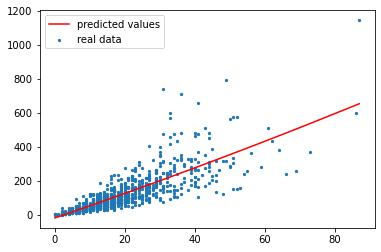

In [38]:

X = df["H"].to_numpy().reshape(-1, 1) 
y = df["P"].to_numpy().reshape(-1, 1) 

# linear pipe
pipe = Pipeline([ ("Knn",LinearRegression())])
pipe.fit(X,y)
pipe.predict(X)
print(f" R^2 = {pipe.score(X,y)}")
print(pipe.named_steps['Knn'].coef_)




# print(pd.DataFrame(grid.cv_results_))

# lineargraph

plt.ylabel("Δημοσιεύσεις")
plt.xlabel("h-index")
plt.plot(X,pipe.predict(X),color = "red",label="predicted values" )
plt.scatter(X,y,s=5 ,label="real data")
plt.legend()
plt.savefig('lregH-P.png', dpi=300, bbox_inches='tight')
plt.show()



# poly pipe
pipe = Pipeline([ ("scaler",PolynomialFeatures(2)),("Knn",LinearRegression())])
pipe.fit(X,y)
prediction = pipe.predict(X)

zipped = zip(X,prediction)
szipped = sorted(zipped)
sX , sprediction = zip(*szipped)

print(pipe.score(X,y))
print(pipe.named_steps['Knn'].coef_)



plt.scatter(X,y,s=5 ,label="real data")
plt.plot(sX,sprediction,color="red",label="predicted values")
plt.legend()
plt.savefig("pregH-C.png")
plt.show()





<H4>Linear Poly H-P</H4>


 R^2 = 0.8032088920125299
[[234.46102003]]


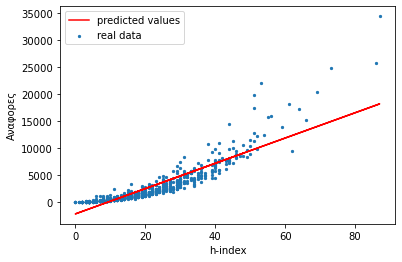

 R^2 = 0.9212688101171602
[[0.         7.41181412 4.19631471]]


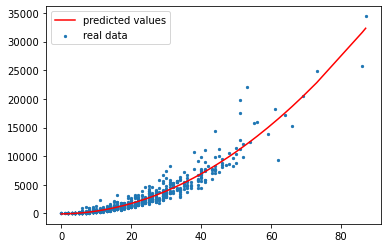

In [39]:



X = df["H"].to_numpy().reshape(-1, 1) 
y = df["C"].to_numpy().reshape(-1, 1) 

# linear pipe
pipe = Pipeline([ ("Knn",LinearRegression())])
pipe.fit(X,y)
print(f" R^2 = {pipe.score(X,y)}")
print(pipe.named_steps['Knn'].coef_)






# print(pd.DataFrame(grid.cv_results_))

# lineargraph

plt.ylabel("Αναφορες")
plt.xlabel("h-index")
plt.plot(X,pipe.predict(X),color = "red",label="predicted values")
plt.scatter(X,y,s=5 ,label="real data")
plt.legend()
plt.savefig("regH-C.png")
plt.show()


# poly pipe
pipe = Pipeline([ ("scaler",PolynomialFeatures(2)),("Knn",LinearRegression())])
pipe.fit(X,y)
prediction = pipe.predict(X)

zipped = zip(X,prediction)
szipped = sorted(zipped)
sX , sprediction = zip(*szipped)

print(f" R^2 = {pipe.score(X,y)}")

print(pipe.named_steps['Knn'].coef_)



plt.scatter(X,y,s=5 ,label="real data")
plt.plot(sX,sprediction,color="red",label="predicted values")
plt.legend()
plt.savefig("pregH-C.png")
plt.show()
